(18, 18)
[[ 1.00000261e+06 -1.80500000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.80500000e+00  1.00000261e+06 -1.80500000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.80500000e+00  3.61000000e+00 -1.80500000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.80500000e+00  3.61000000e+00
  -1.80500000e+00  0.0000000

<>:67: SyntaxWarning: invalid escape sequence '\p'
<>:67: SyntaxWarning: invalid escape sequence '\p'
C:\Users\c0075\AppData\Local\Temp\ipykernel_1348\3672462066.py:67: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel('$\psi$(x)',size=14)


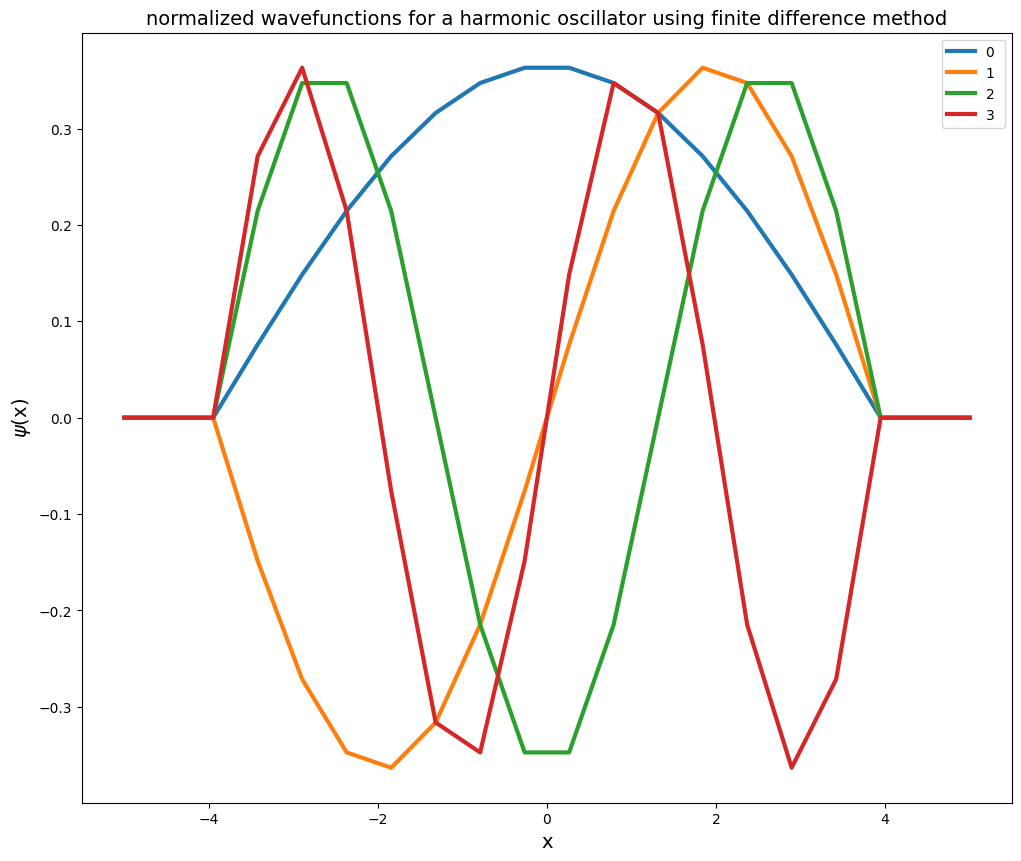

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#Original Credit: Benjamin Obi Tayo Ph.D.  https://medium.com/@benjaminobi

def Vpot(x):
    return x**2

a = -5
b = 5
N = 20

x = np.linspace(a,b,N)
h = x[1]-x[0]

T = np.zeros((N-2)**2).reshape(N-2,N-2)
for i in range(N-2):
    for j in range(N-2):
        if i==j:
            T[i,j]= -2
        elif np.abs(i-j)==1:
            T[i,j]=1
        else:
            T[i,j]=0

#Spring potential
#V = np.zeros((N-2)**2).reshape(N-2,N-2)
#for i in range(N-2):
#    for j in range(N-2):
#        if i==j:
#            V[i,j]= Vpot(x[i+1])
#        else:
#            V[i,j]=0

#Wall Potential
V = np.zeros((N-2)**2).reshape(N-2,N-2)
for i in range(N-2):
    for j in range(N-2):
        if i==j:
            if i > N-5 or i < 2:
                V[i,j] = 999999
            else:
                V[i,j]= 0
        else:
            V[i,j]=0

H = -T/(2*h**2) + V

print(np.shape(H))


val,vec=np.linalg.eig(H)
z = np.argsort(val)
z = z[0:4]
energies=(val[z]/val[z][0])

plt.figure(figsize=(12,10))
for i in range(len(z)):
    y = []
    y = np.append(y,vec[:,z[i]])
    y = np.append(y,0)
    y = np.insert(y,0,0)
    plt.plot(x,y,lw=3, label="{} ".format(i))
    plt.xlabel('x', size=14)
    plt.ylabel('$\psi$(x)',size=14)
plt.legend()
plt.title('normalized wavefunctions for a harmonic oscillator using finite difference method',size=14)
plt.show()